# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 18__

__Nombres de los estudiantes: Hong Xiang Chen, Adrián Turiel Charro y Andrés Teruel Fernández__

In [1]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [3]:
df = pd.read_csv('countries_of_the_world.csv')
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [4]:
# eliminamos la columna Region y las filas de los datos que estan a NaN.
df = df.drop(['Region'], axis=1)
df = df.dropna()
df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Comentarios:
Inicialmente el dataframe presenta un conjunto de datos de 227 filas x 20 columnas, pero tras eliminar la columna 'Region' y aquellas filas con algún valor nulo, el conjunto de datos queda de la forma 179 x 19.
A partir de estos datos, utilizaremos el método de Clustering para clasificar los distintos países en grupos según su similitud.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

### Descripción de las variables

Creemos que las variables representan los siguientes datos:


* Literacy - El % de personas que pueden leer y escribir a partir de una cierta edad.


* GPD per capita - Métrica que describe cuánto gana cada persona de media en ese país al año.


* Phones (per 1000) - Mide el número de teléfonos por cada 1000 habitantes.


* Agriculture, Industry y Service - % de la economía del país en la que afecta cada sector.

In [5]:
subconjunto = df.loc[:,["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture","Industry", "Service"]]
subconjunto

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
6,8600.0,95.0,460.0,0.040,0.180,0.780
7,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541
219,2500.0,90.3,187.7,0.209,0.410,0.381
224,800.0,50.2,37.2,0.135,0.472,0.393
225,800.0,80.6,8.2,0.220,0.290,0.489


### Comentarios:

Hemos creado un nuevo dataframe llamado subconjunto para guardar todas las filas de las columnas seleccionadas, para poder trabajar posteriormente con ella sin tener que modificar la tabla original.

## Análisis de las distribuciones:

In [6]:
#calculamos las estadisticas de cada una de las variables.
subconjunto.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


### Comentarios:

Podemos observar cómo los rangos de las variables (las filas 'min' y 'max') son muy variados lo que hará que tengamos que modificar sus valores para conseguir que nuestro algoritmo funcione (estandarizando, normalizando, ...). Agriculture, Industry y Service parecen ser porcentajes porque toman valores entre 0 y 1 y entre los 3 siempre suman 1. El resto de variables tienen valores mucho mayores y variados.

La media está representada por la fila 'mean', la desviación típica está representada por la fila 'std' y aparecen también los tres cuartiles (25%, 50% y 75%).

## Relaciones entre variables:

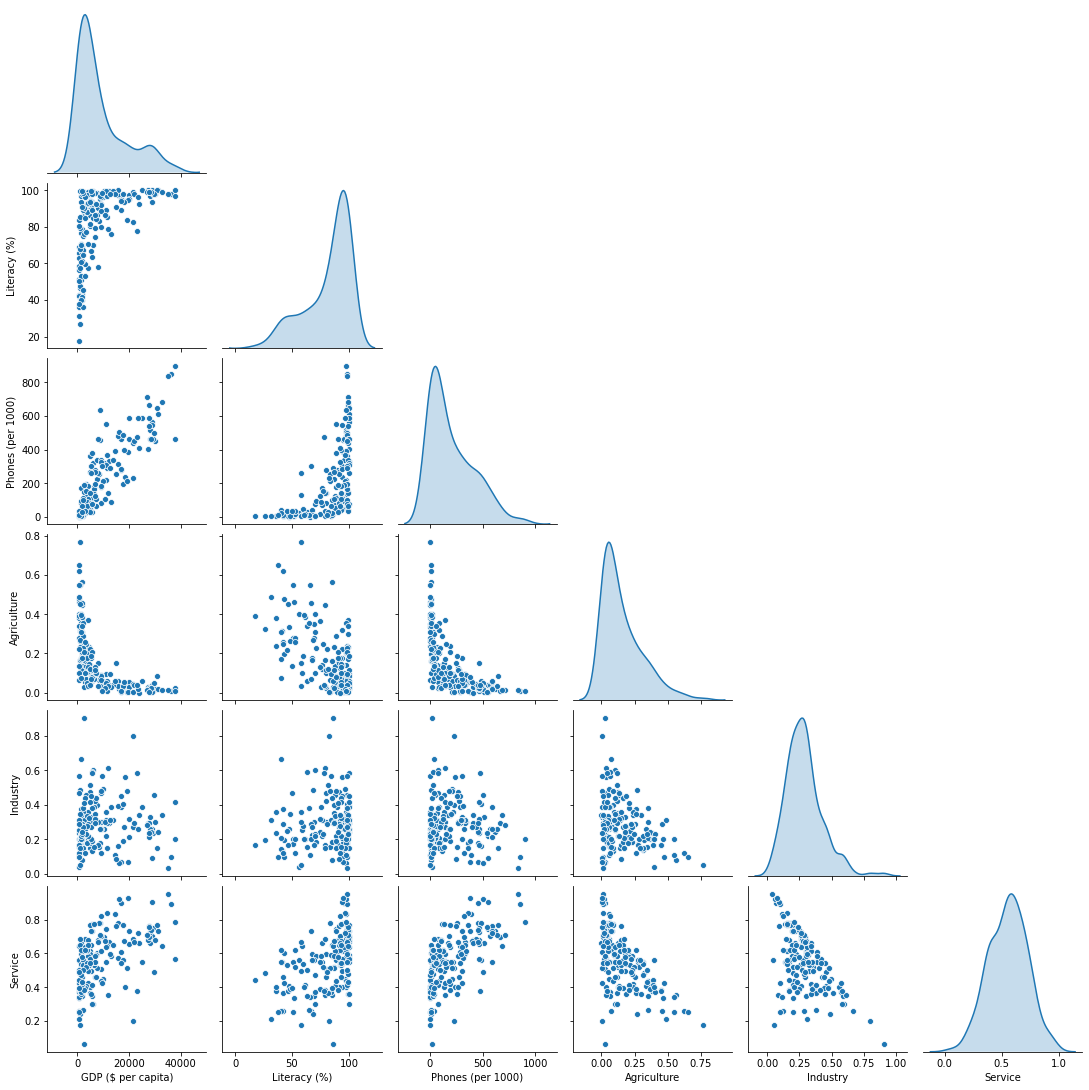

In [7]:
# diagrama de dispersión en función de cada par de variables
sns.pairplot(subconjunto, diag_kind='kde', corner = True)

### Coeficiente de correlación de Pearson:

In [8]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
subconjunto.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


### Comentarios:

Todas las variables siguen a grandes rasgos una distribución normal.

Podemos ver como las variables más relacionadas son **GPD ($ per capita)** y **Phones (per 1000)**. Tienen un coeficiente de correlación de Pearson de 0,88 que está muy cerca del 1 y en los diagramas de dispersión podemos ver como tienen una relación lineal clara.

**Agriculture** está inversamente correlacionada a **GPD**, **Literacy**, **Phones (per 1000)** y **Service**. Esto tiene sentido ya que, en países menos desarrollados, la agricultura tiene un peso muy grande en la economía y su Literatura, GPD y servicios son mucho más bajos que en otros países .

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [9]:
copia = subconjunto.copy()

In [10]:
# StandardScaler cambia la distribución para que estén centrados en 0 y tengan varianza 1 (como una normal) 
scaler = StandardScaler()
scaler.fit(copia)
scaled_data = scaler.transform(copia)

In [11]:
scaled_data

array([[-0.87611209, -2.32251665, -0.97813165,  1.47823878, -0.3432598 ,
        -1.05630628],
       [-0.48098449,  0.23030306, -0.65360217,  0.49758315, -0.7149083 ,
         0.14824877],
       [-0.32501307, -0.60378655, -0.62067197, -0.37042959,  2.22969138,
        -1.55265559],
       ...,
       [-0.86571399, -1.60469408, -0.81586691, -0.14514384,  1.3148643 ,
        -0.97761675],
       [-0.86571399, -0.06794717, -0.95426919,  0.41807053,  0.01409453,
        -0.39652487],
       [-0.75133495,  0.44261677, -0.86550083,  0.14640242, -0.32181854,
         0.14824877]])

In [12]:
dfScaled = pd.DataFrame(scaled_data, columns=subconjunto.columns) # para mostralo más visual, como un DataFrame
dfScaled

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,-0.876112,-2.322517,-0.978132,1.478239,-0.343260,-1.056306
1,-0.480984,0.230303,-0.653602,0.497583,-0.714908,0.148249
2,-0.325013,-0.603787,-0.620672,-0.370430,2.229691,-1.552656
3,-0.054663,0.659986,1.201943,-0.774619,-0.772085,1.364910
4,0.194892,0.356680,1.630990,-0.787871,-0.486202,1.140947
...,...,...,...,...,...,...
174,-0.449790,0.579104,-0.324777,-0.774619,0.936069,-0.081767
175,-0.688946,0.422396,-0.097607,0.345184,0.871745,-1.050253
176,-0.865714,-1.604694,-0.815867,-0.145144,1.314864,-0.977617
177,-0.865714,-0.067947,-0.954269,0.418071,0.014095,-0.396525


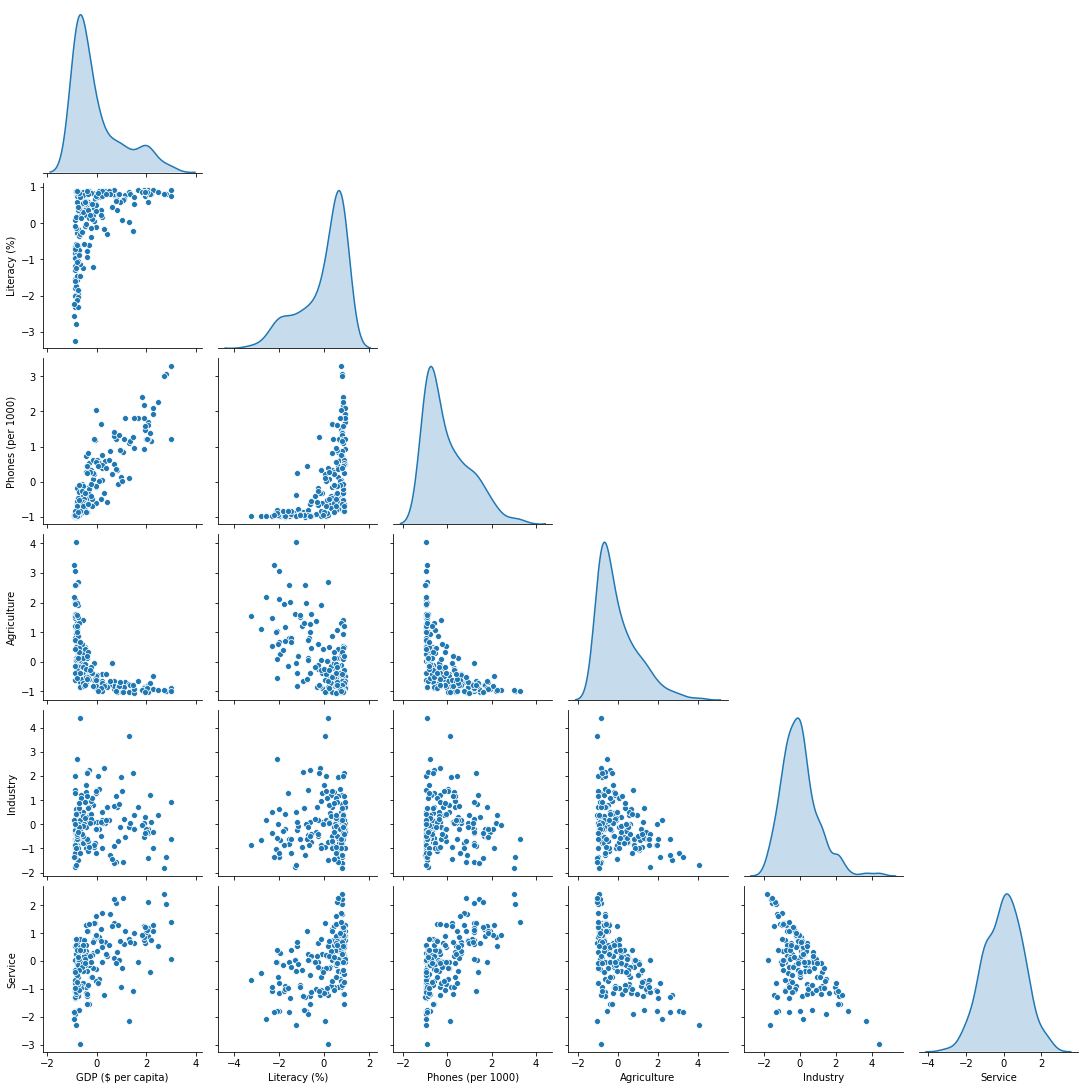

In [13]:
# diagrama de dispersión en función de cada par de variables
sns.pairplot(dfScaled, diag_kind='kde', corner = True)

### Comentarios

Debido a que los datos de agricultura, industria y servicios están medidos entre 0 y 1 (ya que son porcentajes), estamos obligados a cambiar las escalas de los datos ya que las otras medidas tienen datos con valores mucho mayores ('GDP' tiene valores entre 500 y 37800) y al centrarse el algoritmo en agrupar los puntos "más cercanos" (aunque sea en 6 dimensiones), deberían tener unos rangos parecidos para que tengan todas las variables el mismo peso.

Aprovechando que todas las variables siguen una distribución normal, hemos decidido estandarizarlas. Tras aplicar la estandarización, vemos que los datos mantienen las mismas distribuciones que antes pero ahora en un mismo rango de valores, centradas en cero y con una varianza de uno.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [14]:

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [15]:
X = scaled_data

K_MIN = 2
K_MAX = 10
score = np.zeros(K_MAX-K_MIN)
davies_boulding = np.zeros(K_MAX-K_MIN)
silhouette = np.zeros(K_MAX-K_MIN)

for k in range(K_MIN, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X)
    #plot_clusters(X, km.labels_, km.cluster_centers_)

    score[k-K_MIN] = -1 * km.score(X)
    davies_boulding[k-K_MIN] = davies_bouldin_score(X, km.labels_)
    silhouette[k-K_MIN] = silhouette_score(X, km.labels_)

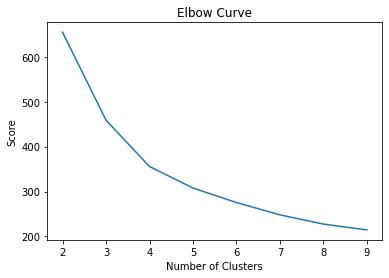

In [16]:
# diagrama del codo
plt.plot(range(K_MIN, K_MAX), score)  # dibuja la gráfica
plt.xlabel('Number of Clusters')      # añade un titulo a los ejes
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()                            # muesta la gráfica
# En el diagrama del codo buscamos un valor de K en el que la curva deja de descender tan rápidamente.
# En este caso podemos ver que K=4 es una buena elección

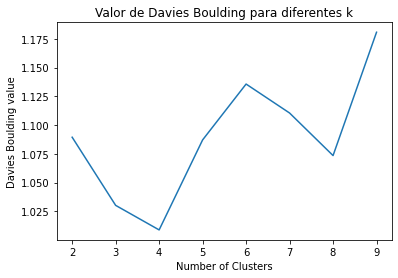

In [17]:
# davies boulding
plt.plot(range(K_MIN, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()
#El mejor valor de Davies–Bouldin (el más pequeño) se obtiene también para K = 4.

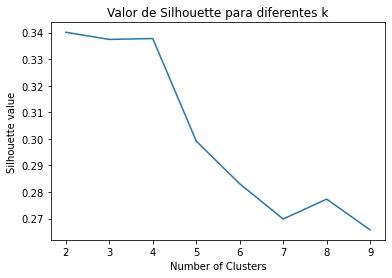

In [18]:
# silhouette
plt.plot(range(K_MIN, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()
# El mejor valor de Silhouette (el más cercano a 1) se obtiene también para k=4. El k=2 también sería
# una buena opción, pero para mayor similitud con las otras gráfica elegiremos el k=4.

* Comentarios: Como estamos en aprendizaje no supervisado, no hay una solución correcta. El objetivo es descubrir una estructura en los datos. En este caso las 3 métricas nos dan el mismo resultado. En general esto no tiene por qué ser así, pero nos ayuda a confirmar y fortalecer la decisión de agrupar los datos con 4 clústeres.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [19]:
# Crear una instancia del agrupador k-means con 4 clústeres
km = KMeans(init='random', n_clusters=4, random_state=RANDOM_STATE)

# Agrupar los puntos en clústeres
km.fit(dfScaled)

# Podemos consultar el clúster asignado a cada punto y el centro de cada clúster
labels = km.labels_
centers = km.cluster_centers_
subconjunto['label'] = labels

In [20]:
# agrupamos todos los elementos por clústeres y obtenemos su información correspondiente
# mostramos la matriz transpuesta para que la información salga en vertical
subconjunto.groupby(["label"]).describe().transpose()

label                               0             1             2  \
GDP ($ per capita) count    39.000000     73.000000     39.000000   
                   mean   1384.615385   5745.205479  24115.384615   
                   std     627.668393   3927.221279   7832.608575   
                   min     500.000000    700.000000   8600.000000   
                   25%     800.000000   2600.000000  17900.000000   
                   50%    1300.000000   4800.000000  26800.000000   
                   75%    1800.000000   7600.000000  29050.000000   
                   max    2900.000000  16900.000000  37800.000000   
Literacy (%)       count    39.000000     73.000000     39.000000   
                   mean     52.251282     88.963014     97.402564   
                   std      14.939472     10.758014      2.373703   
                   min      17.600000     57.700000     89.000000   
                   25%      41.950000     85.100000     96.850000   
                   50%      51.000000     92.300000     98.000000   
                   75%      63.650000     97.800000     99.000000   
                   max      85.300000     99.900000    100.000000   
Phones (per 1000)  count    39.000000     73.000000     39.000000   
                   mean     10.938462    164.931507    531.579487   
                   std      10.065591    111.509644    139.682933   
                   min       0.200000      7.900000    194.500000   
                   25%       3.450000     74.700000    456.750000   
                   50%       7.900000    137.900000    500.500000   
                   75%      14.350000    262.400000    590.350000   
                   max      45.400000    463.800000    898.000000   
Agriculture        count    39.000000     73.000000     39.000000   
                   mean      0.377308      0.132411      0.027128   
                   std       0.134986      0.086018      0.020071   
                   min       0.172000      0.005000      0.000000   
                   25%       0.277500      0.067000      0.010500   
                   50%       0.353000      0.112000      0.021000   
                   75%       0.452500      0.178000      0.039000   
                   max       0.769000      0.370000      0.086000   
Industry           count    39.000000     73.000000     39.000000   
                   mean      0.205179      0.266918      0.236897   
                   std       0.086204      0.076090      0.103010   
                   min       0.040000      0.088000      0.032000   
                   25%       0.150000      0.207000      0.170000   
                   50%       0.200000      0.276000      0.246000   
                   75%       0.255000      0.315000      0.295500   
                   max       0.381000      0.419000      0.460000   
Service            count    39.000000     73.000000     39.000000   
                   mean      0.417718      0.599356      0.735692   
                   std       0.117600      0.092012      0.106456   
                   min       0.177000      0.360000      0.490000   
                   25%       0.351500      0.547000      0.674500   
                   50%       0.401000      0.591000      0.733000   
                   75%       0.526500      0.651000      0.780000   
                   max       0.620000      0.818000      0.954000   

label                                3  
GDP ($ per capita) count     28.000000  
                   mean    7842.857143  
                   std     6436.609907  
                   min      700.000000  
                   25%     3150.000000  
                   50%     5700.000000  
                   75%     9600.000000  
                   max    23200.000000  
Literacy (%)       count     28.000000  
                   mean      83.471429  
                   std       14.470477  
                   min       40.400000  
                   25%       79.250000  
                   50%       85.250000  
   

* Comentarios: 
    El clúster 1, es sin duda el más numeroso, pues prácticamente duplica en cantidad al resto de clústeres. 
    
    Respecto a los ingresos anuales en el clúster 2 destaca su buen sueldo, que resalta en comparación del clúster 1, donde ganan en todo el año lo que el clúster 2 gana en un mes. El resto de los clústeres tienen unos ingresos aceptables, pero tampoco tan excesivos.
    
    Los teléfonos son objetos caros y delicados, se podría decir que es más un lujo (con muchos beneficios) más que una necesidad, y por eso le hace justicia los % obtenidos, pues en los clústeres 0,1 y 3, casi menos del 15% de cada 1000 personas tiene uno, por otro lado, en el clúster dos, donde presentan mayores ingresos, superan el 50%.
    
    En cuanto a la educación o alfabetismo todos los países de los clústeres 0, 2 y 3 tienen un buen rendimiento, pero en el 1 solo la mitad de la población.
    
    En el clúster 1, es donde la agricultura tiene más peso en la economía del país, y tiene sentido pues es en los países más pobres se desempeña mucho ese sector. Por otro lado, la industria supone 20% de la economía de todos los clústeres menos del 3, donde alcanza el 50%. Y finalmente respecto a los servicios que pueden ofrecer los países (transporte, limpieza, telecomunicaciones, sanidad...) el clúster 2 (el más rico) dedica un alto porcentaje llegando al 70%, en el clúster 0 le sigue de cerca y el 1 y 3 están en torno al 40%.
    
    Como resumen el clúster 2 agrupa países de altos ingresos, servicios y con gran porcentaje de teléfonos. El clúster 1 por el contrario, es el más pobre, se centran mayoritariamente en la agricultura y probablemente haya explotación infantil, y los jóvenes tengan que trabajar desde pequeños por necesidad económica, lo que provocaría su reducido porcentaje de alfabetismo. El clúster 0 y 3, no son tan extremos, entre sus diferencias estaría que los países del clúster 3 son más industriales y los del clúster 0 gozan de más servicios.
    
    Por tanto, tres clústeres bastante distintos serían el 1, 2 y 3.

In [21]:
# para el dataframe con la columna nueva
subconjunto

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,label
0,700.0,36.0,3.2,0.380,0.240,0.380,0
1,4500.0,86.5,71.2,0.232,0.188,0.579,1
2,6000.0,70.0,78.1,0.101,0.600,0.298,3
6,8600.0,95.0,460.0,0.040,0.180,0.780,2
7,11000.0,89.0,549.9,0.038,0.220,0.743,2
...,...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541,1
219,2500.0,90.3,187.7,0.209,0.410,0.381,3
224,800.0,50.2,37.2,0.135,0.472,0.393,3
225,800.0,80.6,8.2,0.220,0.290,0.489,1


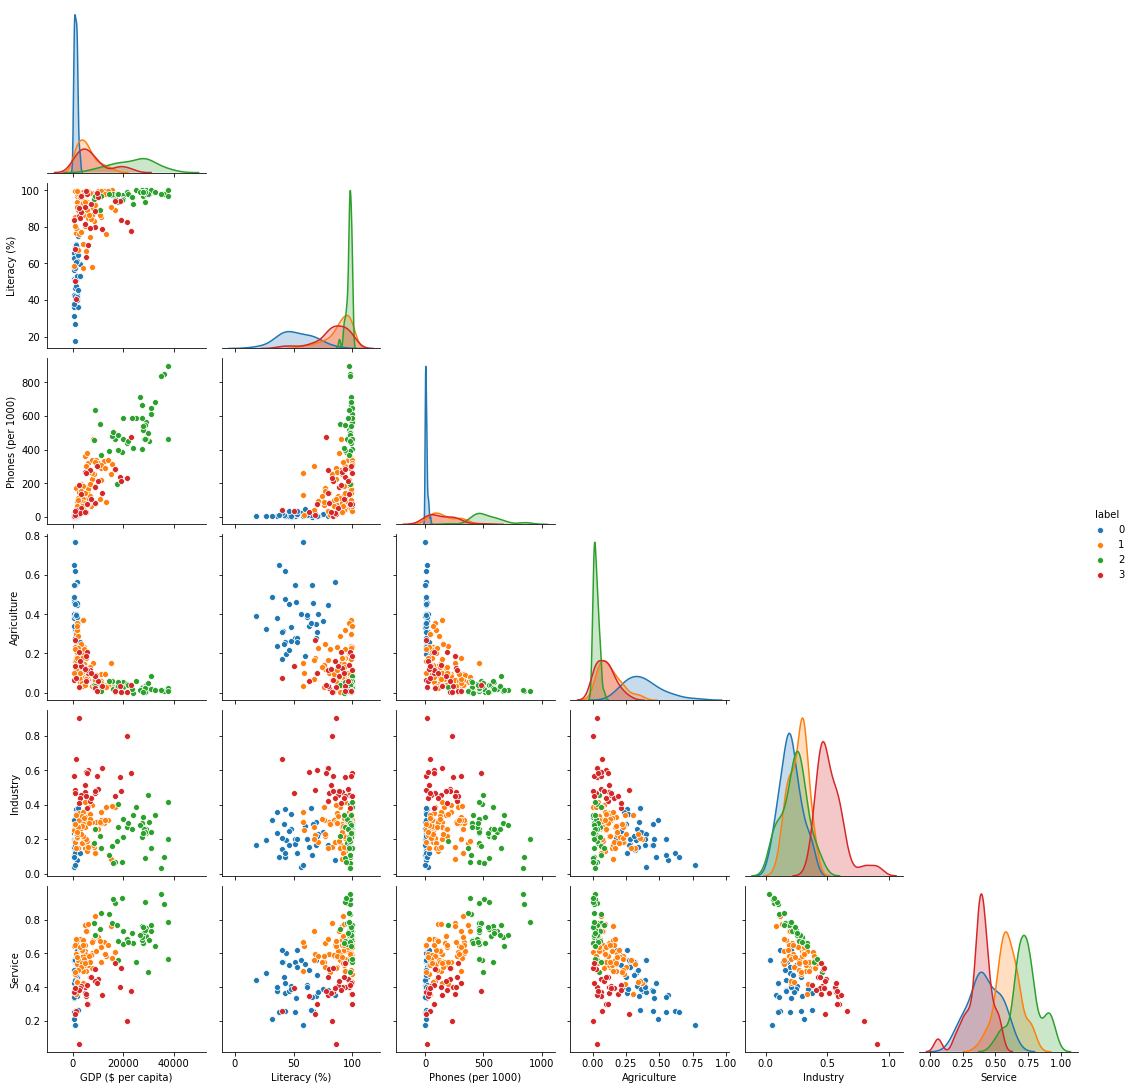

In [22]:
# diagrama de dispersión en función de cada par de variables usando colores diferentes para cada clúster
sns.pairplot(subconjunto, diag_kind='kde', hue='label', corner = True)

* Comentarios: Los diagramas de dispersión de Industry + Phones o de Service + Agriculture son los que mejor separan a los clusters. Podemos ver como prácticamente ningún cluster está entremezclado con otros. 

    En diagramas como Phones + GPD o como Phones + Literacy los clusters 1 y 3 se confunden mucho pero podemos ver en otros diagramas como los de Industry o los de Service como el cluster 3 tiene más industria y menos servicios que el 1.

    El resto de clústeres se separan muy bien de los demás en la mayoría de diagramas de dispersión y los resultados concuerdan con los comentarios hechos anteriormente sobre los clústeres.